# Importing Libararies

In [1]:
import json
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Downlaod & Explore Data

* https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2021-09-17 13:29:37--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.182.128, 173.194.193.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.182.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2021-09-17 13:29:37 (102 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



In [3]:
json_file = '/tmp/sarcasm.json'

with open(json_file) as f:
  datastore = json.load(f)

In [4]:
len(datastore)

26709

In [5]:
datastore[:5]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0},
 {'article_link': 'https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697',
  'headline': "mom starting to fear son's web series closest thing she will have to grandchild",
  'is_sarcastic': 1},
 {'article_link': 'https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302',
  'headline': 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
  'is_sarcastic': 1},
 {'article_link': 'https://www.huffingtonpost.com/entry/jk-rowling-w

In [6]:
sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

In [7]:
print(sentences[0])
print(labels[0])
print(urls[0])

former versace store clerk sues over secret 'black code' for minority shoppers
0
https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5


In [8]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 20000

In [9]:
train_sentences = sentences[0:training_size]
test_sentences  = sentences[training_size:]
train_labels    = labels[0:training_size]
test_labels     = labels[training_size:]

# Create Tokenizer & Sequences

In [10]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)

In [11]:
word_index = tokenizer.word_index
print(len(word_index))

29657


In [12]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded_seq = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_seq = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [13]:
train_padded_seq = np.array(train_padded_seq)
train_labels = np.array(train_labels)
test_padded_seq = np.array(test_padded_seq)
test_labels = np.array(test_labels)

# Create & Train LSTM Model

In [14]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [15]:
num_epochs = 50

history_lstm = model_lstm.fit(train_padded_seq, 
                    train_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_padded_seq, test_labels))

Epoch 1/50
625/625 [==============================] - 46s 61ms/step - loss: 0.4178 - accuracy: 0.7955 - val_loss: 0.3300 - val_accuracy: 0.8569
Epoch 2/50
625/625 [==============================] - 37s 60ms/step - loss: 0.2231 - accuracy: 0.9081 - val_loss: 0.3485 - val_accuracy: 0.8517
Epoch 3/50
625/625 [==============================] - 37s 59ms/step - loss: 0.1497 - accuracy: 0.9438 - val_loss: 0.3892 - val_accuracy: 0.8526
Epoch 4/50
625/625 [==============================] - 37s 59ms/step - loss: 0.1007 - accuracy: 0.9629 - val_loss: 0.4595 - val_accuracy: 0.8457
Epoch 5/50
625/625 [==============================] - 37s 59ms/step - loss: 0.0639 - accuracy: 0.9789 - val_loss: 0.5218 - val_accuracy: 0.8433
Epoch 6/50
625/625 [==============================] - 37s 59ms/step - loss: 0.0422 - accuracy: 0.9865 - val_loss: 0.6456 - val_accuracy: 0.8369
Epoch 7/50
625/625 [==============================] - 37s 59ms/step - loss: 0.0268 - accuracy: 0.9916 - val_loss: 0.7833 - val_accuracy:

In [16]:
model_lstm.evaluate(test_padded_seq, test_labels)

210/210 [==============================] - 4s 17ms/step - loss: 1.8185 - accuracy: 0.8129


[1.8185241222381592, 0.81293785572052]

# Create & Train Model Conv1D

In [17]:
model_conv1d = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv1d.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model_conv1d.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 173,489
Trainable params: 173,489
Non-trainable params: 0
_________________________________________________________________


In [18]:
num_epochs = 50

history_conv1d = model_conv1d.fit(train_padded_seq, 
                    train_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_padded_seq, test_labels))

Epoch 1/50
625/625 [==============================] - 28s 7ms/step - loss: 0.4398 - accuracy: 0.7806 - val_loss: 0.3503 - val_accuracy: 0.8451
Epoch 2/50
625/625 [==============================] - 4s 7ms/step - loss: 0.2225 - accuracy: 0.9128 - val_loss: 0.3684 - val_accuracy: 0.8521
Epoch 3/50
625/625 [==============================] - 4s 7ms/step - loss: 0.1096 - accuracy: 0.9609 - val_loss: 0.4493 - val_accuracy: 0.8422
Epoch 4/50
625/625 [==============================] - 4s 7ms/step - loss: 0.0394 - accuracy: 0.9886 - val_loss: 0.6167 - val_accuracy: 0.8368
Epoch 5/50
625/625 [==============================] - 4s 6ms/step - loss: 0.0120 - accuracy: 0.9972 - val_loss: 0.7524 - val_accuracy: 0.8368
Epoch 6/50
625/625 [==============================] - 4s 6ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.8645 - val_accuracy: 0.8353
Epoch 7/50
625/625 [==============================] - 4s 7ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.9697 - val_accuracy: 0.8351
Epoch

In [23]:
model_conv1d.evaluate(test_padded_seq, test_labels)

210/210 [==============================] - 1s 3ms/step - loss: 2.0344 - accuracy: 0.8235


[2.034430980682373, 0.8235206604003906]

# Create & Train Modle GRU

In [24]:
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_gru.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

model_lstm.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 24)                1560      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 174,129
Trainable params: 174,129
Non-trainable params: 0
_________________________________________________________________


In [25]:
num_epochs = 50

history_gru = model_gru.fit(train_padded_seq, 
                    train_labels, 
                    epochs=num_epochs, 
                    validation_data=(test_padded_seq, test_labels))

Epoch 1/50
625/625 [==============================] - 40s 60ms/step - loss: 0.4101 - accuracy: 0.8012 - val_loss: 0.3378 - val_accuracy: 0.8517
Epoch 2/50
625/625 [==============================] - 37s 59ms/step - loss: 0.2293 - accuracy: 0.9053 - val_loss: 0.3610 - val_accuracy: 0.8456
Epoch 3/50
625/625 [==============================] - 37s 59ms/step - loss: 0.1583 - accuracy: 0.9391 - val_loss: 0.3826 - val_accuracy: 0.8532
Epoch 4/50
625/625 [==============================] - 37s 59ms/step - loss: 0.1049 - accuracy: 0.9633 - val_loss: 0.4806 - val_accuracy: 0.8469
Epoch 5/50
625/625 [==============================] - 37s 59ms/step - loss: 0.0681 - accuracy: 0.9772 - val_loss: 0.5220 - val_accuracy: 0.8457
Epoch 6/50
625/625 [==============================] - 37s 59ms/step - loss: 0.0441 - accuracy: 0.9858 - val_loss: 0.6207 - val_accuracy: 0.8460
Epoch 7/50
625/625 [==============================] - 37s 59ms/step - loss: 0.0275 - accuracy: 0.9911 - val_loss: 0.7459 - val_accuracy:

In [26]:
model_gru.evaluate(test_padded_seq, test_labels)

210/210 [==============================] - 4s 17ms/step - loss: 1.8972 - accuracy: 0.8234


[1.897194743156433, 0.8233715891838074]

# Visualize Loss & Accuracy Graph

In [27]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

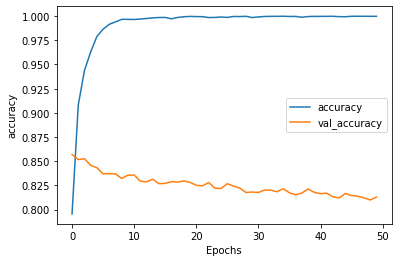

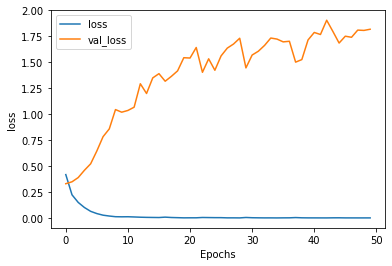

In [28]:
plot_graphs(history_lstm, "accuracy")
plot_graphs(history_lstm, "loss")

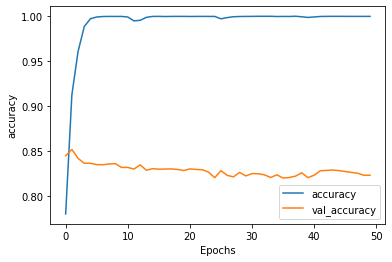

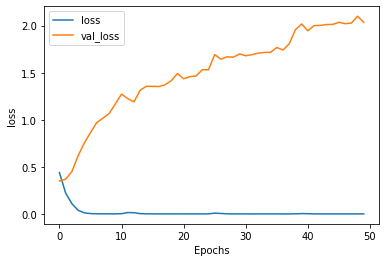

In [29]:
plot_graphs(history_conv1d, "accuracy")
plot_graphs(history_conv1d, "loss")

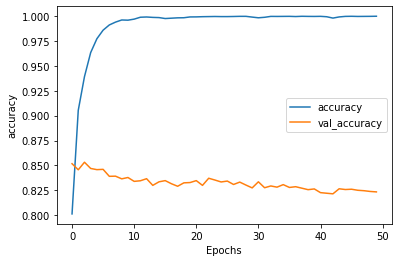

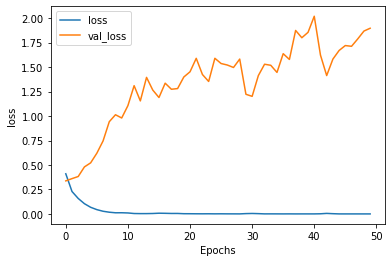

In [30]:
plot_graphs(history_gru, "accuracy")
plot_graphs(history_gru, "loss")

# To Visualize Embedding

In [31]:
reverse_word_index = dict([(v, k) for (k, v) in word_index.items()])
len(word_index), len(reverse_word_index)

(29657, 29657)

In [32]:
def decode_review(text):
  sentence = ' '.join([reverse_word_index.get(i, '?') for i in text])
  return sentence

In [33]:
train_sentences[2]

"mom starting to fear son's web series closest thing she will have to grandchild"

In [34]:
decode_review(train_padded_seq[2])

"mom starting to fear son's web series closest thing she will have to <OOV> ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?"

In [35]:
e = model_lstm.layers[0]
e

In [36]:
e.get_weights()[0]

array([[-0.00085548, -0.00583667,  0.03421297, ...,  0.06763759,
        -0.01419389,  0.01330339],
       [ 0.01285529, -0.00892177,  0.00870921, ..., -0.01133798,
        -0.02875057,  0.01425301],
       [-0.05460152,  0.01982664,  0.02872801, ..., -0.03859276,
        -0.04900049,  0.00271756],
       ...,
       [-0.04447538, -0.06643429,  0.03450427, ...,  0.0112729 ,
        -0.04977357,  0.10784151],
       [ 0.02116258,  0.05393932, -0.01558902, ..., -0.03621558,
         0.05056609,  0.02694941],
       [-0.08889654, -0.08843566,  0.06282237, ...,  0.03272734,
        -0.09846266,  0.11391935]], dtype=float32)

In [37]:
weights = e.get_weights()[0]
weights.shape

(10000, 16)

In [ ]:
# Get vectors and metadata

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

# To download these files
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

# Test the Model

In [38]:
sentence = ["granny starting to fear spiders in the garden might be real", 
            "game of thrones season finale showing this sunday night"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(model_lstm.predict(padded))

[[5.69893236e-05]
 [1.10381025e-05]]


In [39]:
print(model_conv1d.predict(padded))

[[1.9315809e-04]
 [6.3202431e-15]]


In [40]:
model_gru.predict(padded)

array([[1.3038260e-02],
       [1.8945838e-09]], dtype=float32)